In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [18]:
import pandas as pd
import numpy as np

from pymongo import MongoClient as mc

class SeedZoneController:
    def __init__(self):
        mongo_uri = "mongodb://localhost:27017"
        self.conn = mc(mongo_uri).TestMuLetter
        self.seed_zone = self.conn.SeedZone
        self.mail_box = self.conn.MailBox
        self.cluster_zone = self.conn.ClusterZone

# Make New Cluster

In [19]:
sz = SeedZoneController()

In [20]:
_seed_features = sz.seed_zone.find({}, {
    "_id": 0,
    "label": 0
})
seed_features = pd.DataFrame([_ for _ in _seed_features])
_seed_features = seed_features.iloc[:, 1:].values.copy()
norm_features = (_seed_features - _seed_features.min(axis=0)) /\
            (_seed_features.max(axis=0) - _seed_features.min(axis=0))

In [21]:
from src.utils import KMeans

In [22]:
kmeans = KMeans(norm_features)

ECV 47%
ECV 54%
ECV 56%
ECV 57%
ECV 57%
ECV 57%
ECV 57%
ECV 57%
ECV 57%
ECV 57%
ECV 57%


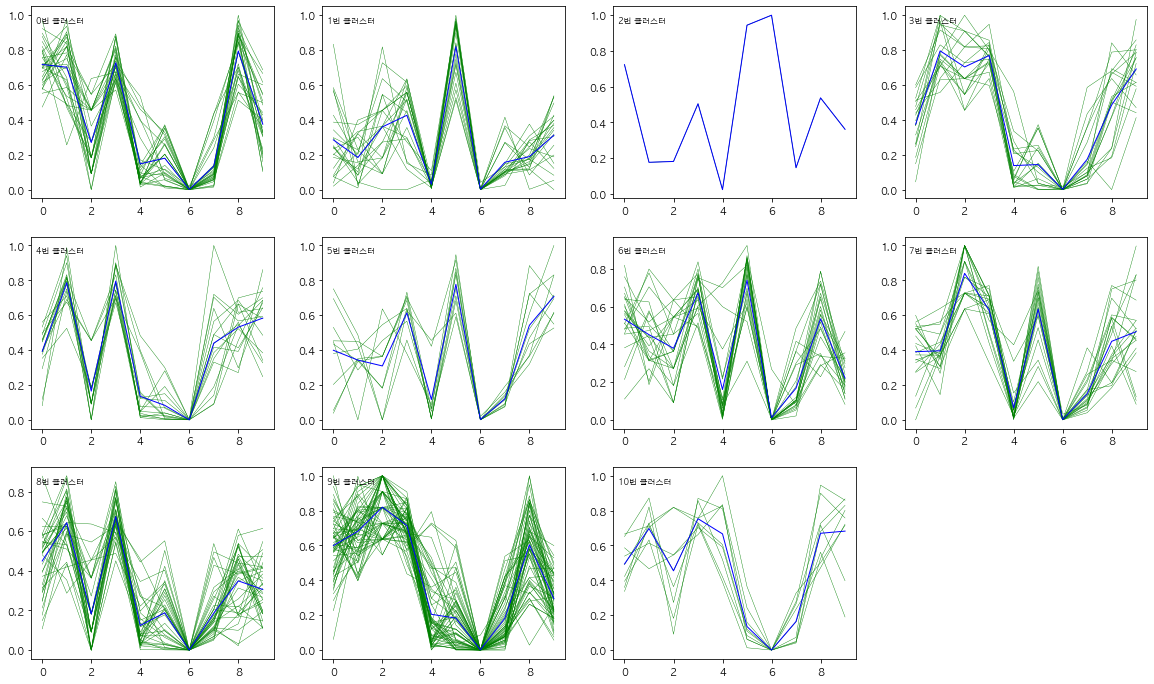

In [23]:
kmeans.fit()
kmeans.cluster_plot()

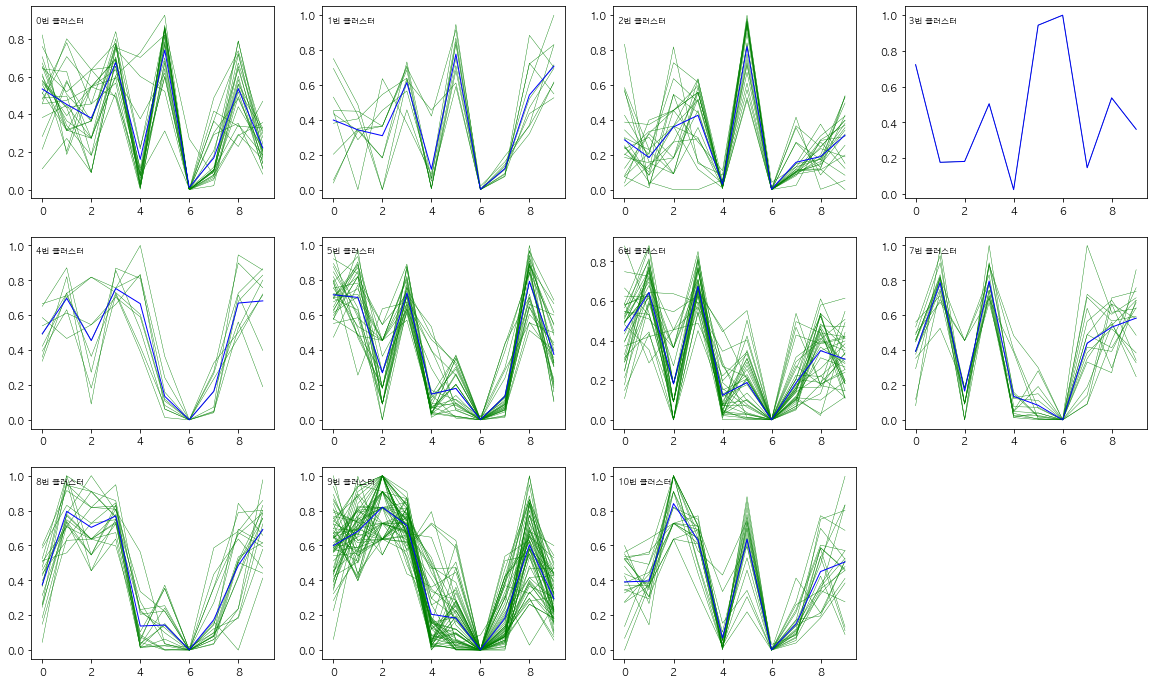

In [24]:
kmeans.sorting()
kmeans.cluster_plot()

In [30]:
cluster_info = pd.DataFrame(
    np.column_stack((seed_features['trackId'].values, kmeans.labels_)),
    columns=['trackId', 'label']
)

cluster_info.head()

,trackId,label
0,1c3WMOE7Q0dCFN6bjT8KWo,9
1,63Voq4pFih68SpKmQShfS4,3
2,2eLe81VDUQ5f0xFfc9cMWz,5
3,1nTfhIRbAsSLRMb3eTJZxZ,9
4,4yMeebFYtbx7BP4GOiBfTK,9


In [32]:
for idx, row in cluster_info.iterrows():
    sz.seed_zone.update_one({
        "trackId": row['trackId']
    }, {
        "$set": {
            "label": row['label']
        }
    })